In [1]:
import pandas as pd
import numpy as np
import unidecode
import matplotlib as mpl
from adjustText import adjust_text
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 15
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'
mpl.rcParams['axes.labelweight'] = 'heavy'

In [3]:
url_defence = 'https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats'
url_passing = 'https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats'
url_shooting = 'https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats'

In [4]:
data_defence = pd.read_html(url_defence, header=1)[0]
data_defence = data_defence[data_defence['Player'] != 'Player']
data_defence = data_defence.drop(columns=['Rk', 'Matches'])
data_defence

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,TklW,...,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-043,2000,22.6,51,30,...,85,24,63,16,0,47,37,88,45,0
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-141,1987,22.1,38,29,...,111,17,44,18,1,26,76,114,74,0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-327,2000,20.2,42,26,...,239,56,22,1,0,21,38,80,14,0
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-015,1993,20.3,69,40,...,288,56,30,1,0,29,50,119,9,0
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-310,2000,0.5,0,0,...,11,3,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-014,1999,16.3,36,16,...,110,34,20,8,0,12,24,60,31,0
2860,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-144,1997,15.2,33,24,...,107,66,29,5,0,24,33,66,19,2
2861,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-061,1998,15.3,22,12,...,115,105,7,1,0,6,9,31,8,1
2862,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-270,1990,11.9,4,3,...,38,51,3,2,0,1,2,6,16,0


In [5]:
data_passing = pd.read_html(url_passing, header=1)[0]
data_passing = data_passing[data_passing['Player'] != 'Player']
data_passing = data_passing.drop(columns=['Rk', 'Matches'])
data_passing

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp,Att,...,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-043,2000,22.6,754,1004,...,160,43.8,1,0.9,+0.1,12,37,28,7,72
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-141,1987,22.1,856,1042,...,201,64.7,0,0.2,-0.2,6,50,4,0,53
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-327,2000,20.2,1186,1292,...,174,85.1,0,0.8,-0.8,9,52,5,0,49
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-015,1993,20.3,836,1020,...,197,68.0,1,1.7,-0.7,14,78,13,6,79
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-310,2000,0.5,2,6,...,0,NaN,0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-014,1999,16.3,664,780,...,126,71.4,1,0.4,+0.6,8,62,7,1,58
2860,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-144,1997,15.2,464,558,...,53,67.9,1,1.0,0.0,14,37,14,2,46
2861,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-061,1998,15.3,653,786,...,117,65.8,4,3.6,+0.4,38,40,30,1,72
2862,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-270,1990,11.9,188,325,...,4,75.0,1,1.0,0.0,9,12,0,0,13


In [6]:
data_shooting = pd.read_html(url_shooting, header=1)[0]
data_shooting = data_shooting[data_shooting['Player'] != 'Player']
data_shooting = data_shooting.drop(columns=['Rk', 'Matches'])
data_shooting

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-043,2000,22.6,0,10,...,0.00,20.1,0,0,0,0.6,0.6,0.06,-0.6,-0.6
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-141,1987,22.1,1,14,...,0.25,19.1,0,0,0,1.0,1.0,0.07,0.0,0.0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-327,2000,20.2,0,12,...,0.00,18.6,0,0,0,0.6,0.6,0.05,-0.6,-0.6
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-015,1993,20.3,0,19,...,0.00,21.6,0,0,0,1.7,1.7,0.09,-1.7,-1.7
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-310,2000,0.5,0,0,...,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-014,1999,16.3,0,6,...,0.00,16.2,0,0,0,0.4,0.4,0.07,-0.4,-0.4
2860,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-144,1997,15.2,4,33,...,0.29,19.9,0,0,0,2.7,2.7,0.08,+1.3,+1.3
2861,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-061,1998,15.3,4,22,...,0.40,21.0,8,0,0,1.8,1.8,0.08,+2.2,+2.2
2862,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-270,1990,11.9,2,19,...,0.17,9.5,0,1,1,3.2,2.4,0.13,-1.2,-1.4


In [7]:
player_position = pd.read_excel('Player Positions-FBRef format.xlsx')
player_position.drop_duplicates(inplace=True)
set(player_position['Position'])

{'Attacking Midfield',
 'Central Midfield',
 'Centre-Back',
 'Centre-Forward',
 'Defender',
 'Defensive Midfield',
 'Goalkeeper',
 'Left Midfield',
 'Left Winger',
 'Left-Back',
 'Right Midfield',
 'Right Winger',
 'Right-Back',
 'Second Striker',
 'attack',
 'midfield'}

In [8]:
data_defence.iloc[:, 7:] = data_defence.iloc[:, 7:].astype(float)
data_passing.iloc[:, 7:] = data_passing.iloc[:, 7:].astype(float)
data_shooting.iloc[:, 7:] = data_shooting.iloc[:, 7:].astype(float)

In [9]:
data_defence.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2754 entries, 0 to 2863
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Player     2754 non-null   object
 1   Nation     2753 non-null   object
 2   Pos        2754 non-null   object
 3   Squad      2754 non-null   object
 4   Comp       2754 non-null   object
 5   Age        2753 non-null   object
 6   Born       2753 non-null   object
 7   90s        2754 non-null   object
 8   Tkl        2754 non-null   object
 9   TklW       2754 non-null   object
 10  Def 3rd    2754 non-null   object
 11  Mid 3rd    2754 non-null   object
 12  Att 3rd    2754 non-null   object
 13  Tkl.1      2754 non-null   object
 14  Att        2754 non-null   object
 15  Tkl%       2335 non-null   object
 16  Past       2754 non-null   object
 17  Press      2754 non-null   object
 18  Succ       2754 non-null   object
 19  %          2638 non-null   object
 20  Def 3rd.1  2754 non-null   obj

In [10]:
data_shooting = data_shooting.drop(columns=['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'])
data_passing = data_passing.drop(columns=['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'])

In [11]:
data = pd.merge(data_defence, data_shooting, on="Player")
data = data.drop_duplicates(subset='Player')
data = pd.merge(data, data_passing, on='Player')
data = data.drop_duplicates(subset='Player')
data

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,TklW,...,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-043,2000,22.6,51.0,30.0,...,160.0,43.8,1.0,0.9,0.1,12.0,37.0,28.0,7.0,72.0
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-141,1987,22.1,38.0,29.0,...,201.0,64.7,0.0,0.2,-0.2,6.0,50.0,4.0,0.0,53.0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-327,2000,20.2,42.0,26.0,...,174.0,85.1,0.0,0.8,-0.8,9.0,52.0,5.0,0.0,49.0
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-015,1993,20.3,69.0,40.0,...,197.0,68.0,1.0,1.7,-0.7,14.0,78.0,13.0,6.0,79.0
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-310,2000,0.5,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-014,1999,16.3,36.0,16.0,...,126.0,71.4,1.0,0.4,0.6,8.0,62.0,7.0,1.0,58.0
2750,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-144,1997,15.2,33.0,24.0,...,53.0,67.9,1.0,1.0,0.0,14.0,37.0,14.0,2.0,46.0
2751,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-061,1998,15.3,22.0,12.0,...,117.0,65.8,4.0,3.6,0.4,38.0,40.0,30.0,1.0,72.0
2752,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-270,1990,11.9,4.0,3.0,...,4.0,75.0,1.0,1.0,0.0,9.0,12.0,0.0,0.0,13.0


In [12]:
data = pd.merge(player_position, data, on="Player")
data.drop_duplicates(inplace=True)
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,4,Yunis Abdelhamid,Centre-Back,ma MAR,DF,Reims,fr Ligue 1,34-141,1987,22.1,...,201.0,64.7,0.0,0.2,-0.2,6.0,50.0,4.0,0.0,53.0
1,7,Laurent Abergel,Defensive Midfield,fr FRA,MF,Lorient,fr Ligue 1,29-015,1993,20.3,...,197.0,68.0,1.0,1.7,-0.7,14.0,78.0,13.0,6.0,79.0
2,8,Charles Abi,Centre-Forward,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-310,2000,0.5,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,Matthis Abline,Centre-Forward,fr FRA,FW,Rennes,fr Ligue 1,18-325,2003,1.1,...,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
4,12,Tammy Abraham,Centre-Forward,eng ENG,FW,Roma,it Serie A,24-137,1997,22.6,...,31.0,80.6,3.0,2.8,0.2,24.0,19.0,20.0,2.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,2817,Kurt Zouma,Centre-Back,fr FRA,DF,West Ham,eng Premier League,27-112,1994,12.8,...,101.0,66.3,0.0,0.0,0.0,0.0,9.0,1.0,0.0,19.0
1842,2818,Igor Zubeldia,Defensive Midfield,es ESP,"DF,MF",Real Sociedad,es La Liga,24-323,1997,8.7,...,119.0,78.2,1.0,0.0,1.0,0.0,28.0,1.0,0.0,14.0
1843,2820,Martín Zubimendi,Defensive Midfield,es ESP,MF,Real Sociedad,es La Liga,23-014,1999,16.3,...,126.0,71.4,1.0,0.4,0.6,8.0,62.0,7.0,1.0,58.0
1844,2822,Martin Ødegaard,Attacking Midfield,no NOR,MF,Arsenal,eng Premier League,23-061,1998,15.3,...,117.0,65.8,4.0,3.6,0.4,38.0,40.0,30.0,1.0,72.0


In [13]:
data = data[data['90s']>=5.0]
who = ['Centre-Back', 'Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x : x in who)]
data['TAp90'] = data['Tkl+Int']/data['90s']
data['Clrp90'] = data['Clr']/data['90s']
data['Bp90'] = data['Blocks']/data['90s']
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,TAp90,Clrp90,Bp90
0,4,Yunis Abdelhamid,Centre-Back,ma MAR,DF,Reims,fr Ligue 1,34-141,1987,22.1,...,0.2,-0.2,6.0,50.0,4.0,0.0,53.0,5.158371,3.348416,1.99095
5,15,Francesco Acerbi,Centre-Back,it ITA,DF,Lazio,it Serie A,34-006,1988,17.1,...,0.2,-0.2,4.0,86.0,4.0,0.0,66.0,2.807018,4.444444,1.754386
7,17,Marcos Acuña,Left-Back,ar ARG,DF,Sevilla,es La Liga,30-111,1991,16.6,...,2.3,0.7,30.0,67.0,31.0,17.0,85.0,3.674699,1.385542,1.204819
12,26,Martin Agirregabiria,Right-Back,es ESP,DF,Alavés,es La Liga,25-282,1996,16.2,...,0.9,0.1,13.0,42.0,18.0,10.0,51.0,3.765432,2.530864,1.666667
15,30,Nayef Aguerd,Centre-Back,ma MAR,DF,Rennes,fr Ligue 1,25-323,1996,19.9,...,0.3,0.7,1.0,71.0,2.0,0.0,55.0,2.462312,5.025126,1.105528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,2793,Joseba Zaldúa,Right-Back,es ESP,DF,Real Sociedad,es La Liga,29-237,1992,8.7,...,0.4,-0.4,4.0,18.0,10.0,3.0,24.0,3.678161,2.988506,1.954023
1828,2799,Gabriele Zappa,Right-Back,it ITA,DF,Cagliari,it Serie A,22-056,1999,11.0,...,0.9,-0.9,7.0,19.0,6.0,5.0,29.0,3.363636,1.272727,2.0
1832,2803,Deyovaisio Zeefuik,Right-Back,nl NED,"DF,MF",Hertha BSC,de Bundesliga,23-342,1998,6.3,...,0.4,-0.4,4.0,7.0,5.0,1.0,20.0,3.809524,2.698413,2.698413
1838,2811,Oleksandr Zinchenko,Left-Back,ua UKR,DF,Manchester City,eng Premier League,25-063,1996,6.6,...,0.9,0.1,7.0,55.0,14.0,3.0,46.0,3.636364,1.212121,1.060606


In [14]:
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,TAp90,Clrp90,Bp90
0,4,Yunis Abdelhamid,Centre-Back,ma MAR,DF,Reims,fr Ligue 1,34-141,1987,22.1,...,0.2,-0.2,6.0,50.0,4.0,0.0,53.0,5.158371,3.348416,1.99095
5,15,Francesco Acerbi,Centre-Back,it ITA,DF,Lazio,it Serie A,34-006,1988,17.1,...,0.2,-0.2,4.0,86.0,4.0,0.0,66.0,2.807018,4.444444,1.754386
7,17,Marcos Acuña,Left-Back,ar ARG,DF,Sevilla,es La Liga,30-111,1991,16.6,...,2.3,0.7,30.0,67.0,31.0,17.0,85.0,3.674699,1.385542,1.204819
12,26,Martin Agirregabiria,Right-Back,es ESP,DF,Alavés,es La Liga,25-282,1996,16.2,...,0.9,0.1,13.0,42.0,18.0,10.0,51.0,3.765432,2.530864,1.666667
15,30,Nayef Aguerd,Centre-Back,ma MAR,DF,Rennes,fr Ligue 1,25-323,1996,19.9,...,0.3,0.7,1.0,71.0,2.0,0.0,55.0,2.462312,5.025126,1.105528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,2793,Joseba Zaldúa,Right-Back,es ESP,DF,Real Sociedad,es La Liga,29-237,1992,8.7,...,0.4,-0.4,4.0,18.0,10.0,3.0,24.0,3.678161,2.988506,1.954023
1828,2799,Gabriele Zappa,Right-Back,it ITA,DF,Cagliari,it Serie A,22-056,1999,11.0,...,0.9,-0.9,7.0,19.0,6.0,5.0,29.0,3.363636,1.272727,2.0
1832,2803,Deyovaisio Zeefuik,Right-Back,nl NED,"DF,MF",Hertha BSC,de Bundesliga,23-342,1998,6.3,...,0.4,-0.4,4.0,7.0,5.0,1.0,20.0,3.809524,2.698413,2.698413
1838,2811,Oleksandr Zinchenko,Left-Back,ua UKR,DF,Manchester City,eng Premier League,25-063,1996,6.6,...,0.9,0.1,7.0,55.0,14.0,3.0,46.0,3.636364,1.212121,1.060606


In [15]:
data = data[data['90s']>=5.0]
who = ['Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x : x in who)]
data['TAp90'] = data['Tkl+Int']/data['90s']
data['Clrp90'] = data['Clr']/data['90s']
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,TAp90,Clrp90,Bp90
7,17,Marcos Acuña,Left-Back,ar ARG,DF,Sevilla,es La Liga,30-111,1991,16.6,...,2.3,0.7,30.0,67.0,31.0,17.0,85.0,3.674699,1.385542,1.204819
12,26,Martin Agirregabiria,Right-Back,es ESP,DF,Alavés,es La Liga,25-282,1996,16.2,...,0.9,0.1,13.0,42.0,18.0,10.0,51.0,3.765432,2.530864,1.666667
17,32,Ruben Aguilar,Right-Back,fr FRA,DF,Monaco,fr Ligue 1,28-296,1993,15.1,...,0.4,0.6,8.0,86.0,20.0,6.0,89.0,6.622517,3.245033,1.456954
21,39,Ola Aina,Right-Back,ng NGA,DF,Torino,it Serie A,25-131,1996,11.8,...,1.3,-1.3,13.0,34.0,18.0,5.0,49.0,4.237288,2.033898,1.694915
22,41,Rayan Aït Nouri,Left-Back,fr FRA,DF,Wolves,eng Premier League,20-255,2001,11.3,...,0.9,1.1,10.0,16.0,7.0,4.0,23.0,6.637168,1.59292,1.946903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,2749,Brandon Williams,Left-Back,eng ENG,DF,Norwich City,eng Premier League,21-166,2000,16.6,...,0.7,0.3,12.0,32.0,16.0,3.0,61.0,5.060241,1.927711,2.53012
1824,2793,Joseba Zaldúa,Right-Back,es ESP,DF,Real Sociedad,es La Liga,29-237,1992,8.7,...,0.4,-0.4,4.0,18.0,10.0,3.0,24.0,3.678161,2.988506,1.954023
1828,2799,Gabriele Zappa,Right-Back,it ITA,DF,Cagliari,it Serie A,22-056,1999,11.0,...,0.9,-0.9,7.0,19.0,6.0,5.0,29.0,3.363636,1.272727,2.0
1832,2803,Deyovaisio Zeefuik,Right-Back,nl NED,"DF,MF",Hertha BSC,de Bundesliga,23-342,1998,6.3,...,0.4,-0.4,4.0,7.0,5.0,1.0,20.0,3.809524,2.698413,2.698413


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

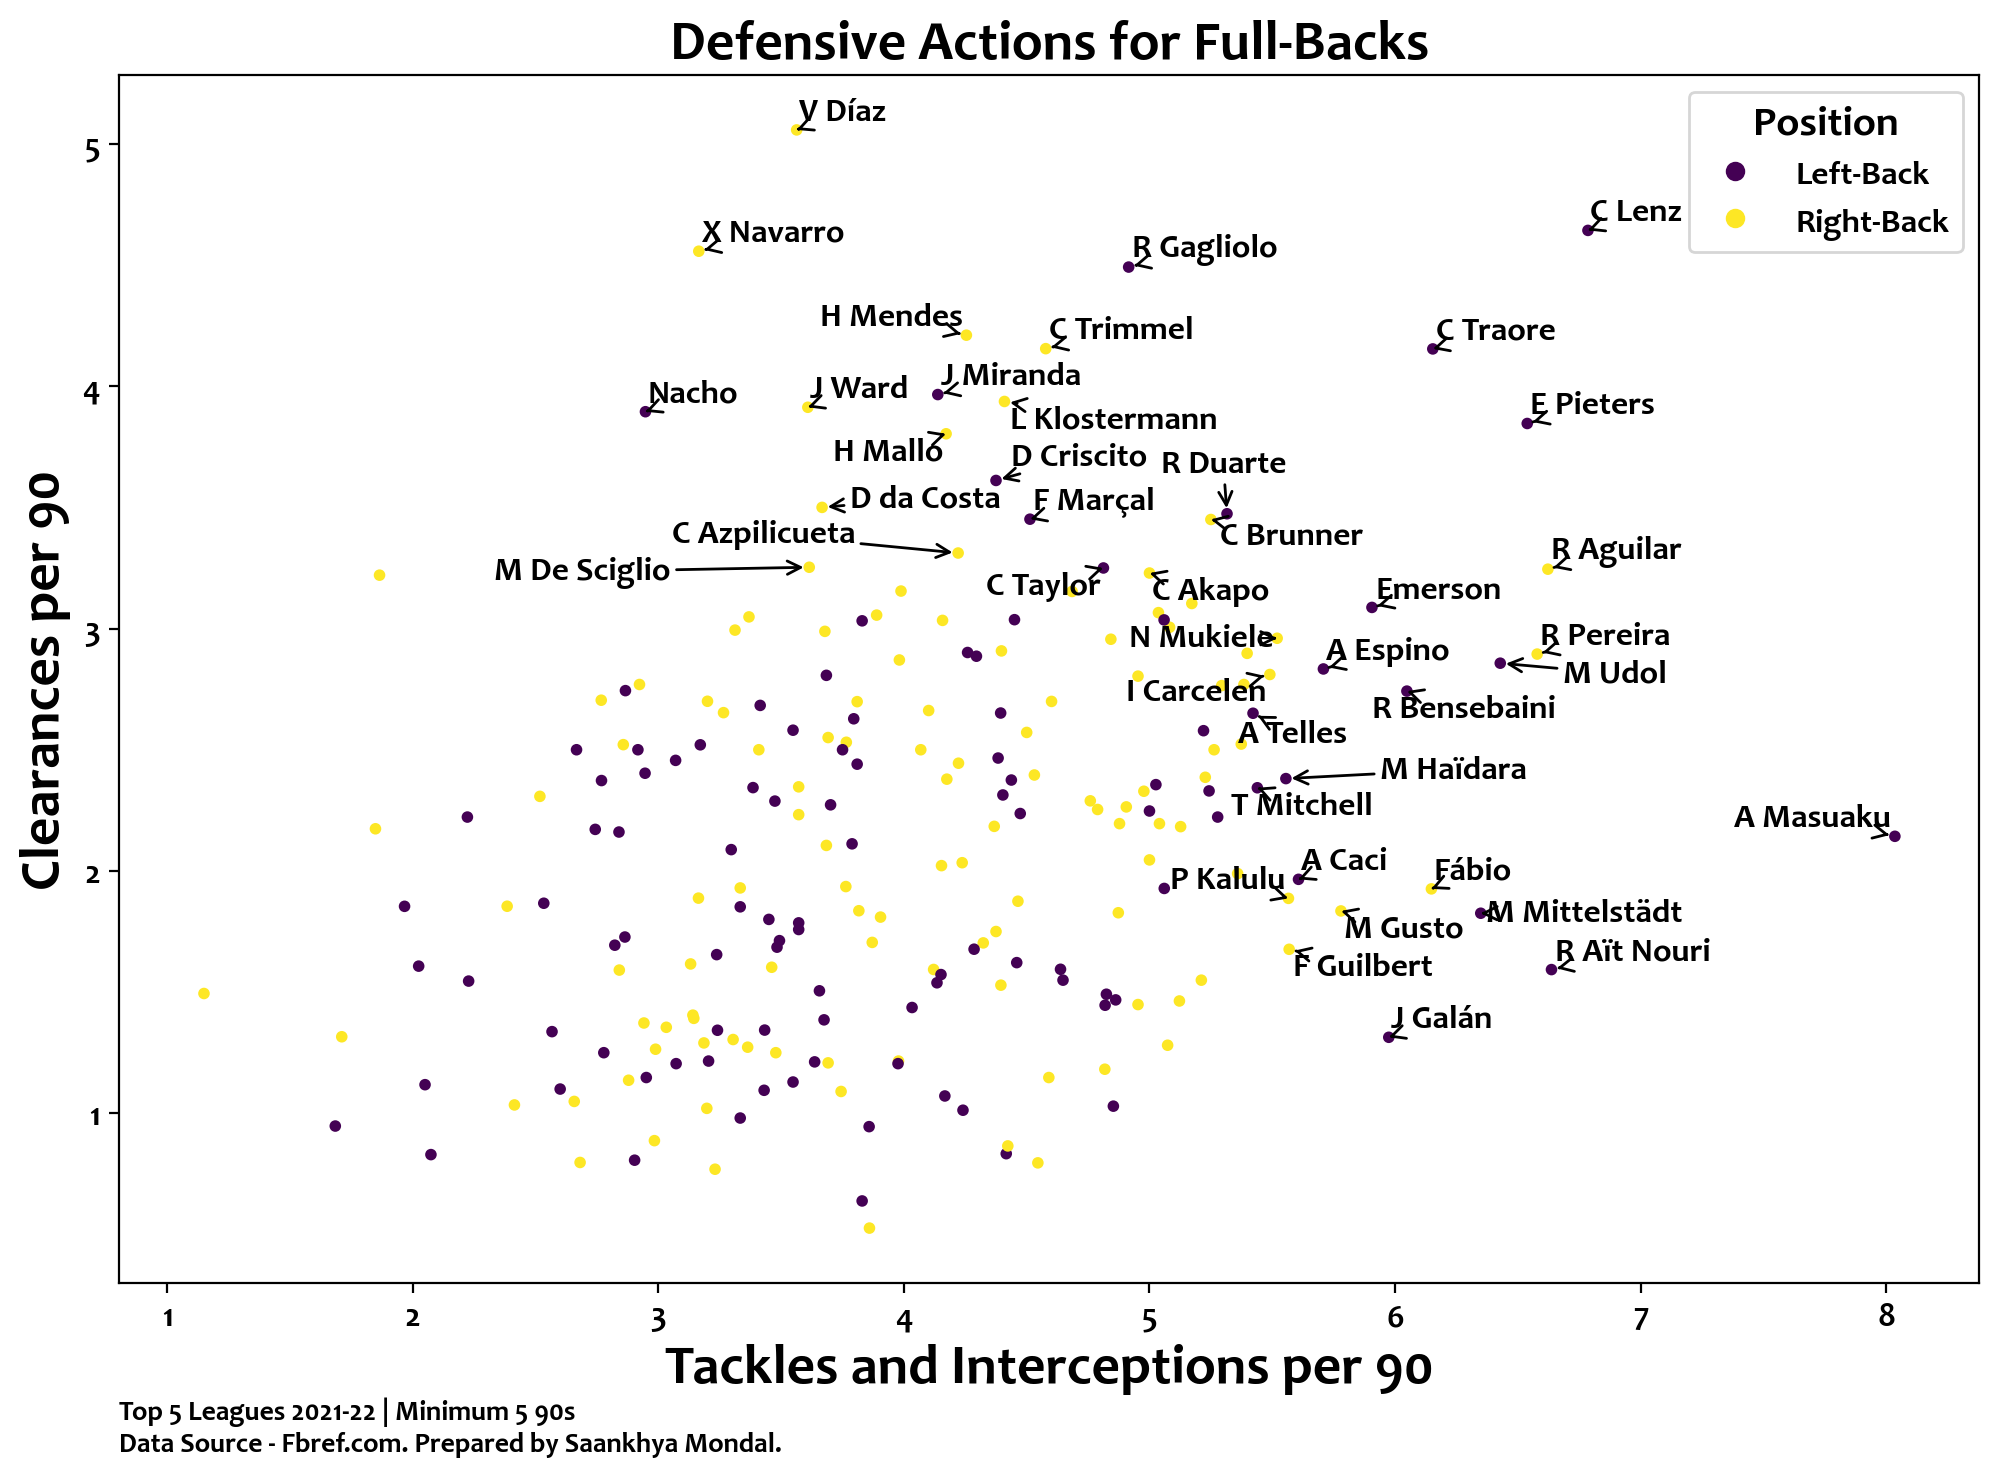

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
par_x = list(data['TAp90'])
par_y = list(data['Clrp90'])
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, c=col_codes, s=10)

outlier_top = data['Clrp90'].astype(float).quantile(0.90)
outlier_bottom = data['Clrp90'].astype(float).quantile(0.02)
outlier_right = data['TAp90'].astype(float).quantile(0.90)
outlier_left = data['TAp90'].astype(float).quantile(0.02)

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('Tackles and Interceptions per 90', fontsize=20)
ax.set_ylabel('Clearances per 90', fontsize=20)
ax.set_title('Defensive Actions for Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [17]:
fig.savefig('Images/DefensiveActions_FB.png', dpi=400, bbox_inches='tight')

In [18]:
data = data[data['90s']>=5.0]
who = ['Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x : x in who)]
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,TAp90,Clrp90,Bp90
7,17,Marcos Acuña,Left-Back,ar ARG,DF,Sevilla,es La Liga,30-111,1991,16.6,...,2.3,0.7,30.0,67.0,31.0,17.0,85.0,3.674699,1.385542,1.204819
12,26,Martin Agirregabiria,Right-Back,es ESP,DF,Alavés,es La Liga,25-282,1996,16.2,...,0.9,0.1,13.0,42.0,18.0,10.0,51.0,3.765432,2.530864,1.666667
17,32,Ruben Aguilar,Right-Back,fr FRA,DF,Monaco,fr Ligue 1,28-296,1993,15.1,...,0.4,0.6,8.0,86.0,20.0,6.0,89.0,6.622517,3.245033,1.456954
21,39,Ola Aina,Right-Back,ng NGA,DF,Torino,it Serie A,25-131,1996,11.8,...,1.3,-1.3,13.0,34.0,18.0,5.0,49.0,4.237288,2.033898,1.694915
22,41,Rayan Aït Nouri,Left-Back,fr FRA,DF,Wolves,eng Premier League,20-255,2001,11.3,...,0.9,1.1,10.0,16.0,7.0,4.0,23.0,6.637168,1.59292,1.946903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,2749,Brandon Williams,Left-Back,eng ENG,DF,Norwich City,eng Premier League,21-166,2000,16.6,...,0.7,0.3,12.0,32.0,16.0,3.0,61.0,5.060241,1.927711,2.53012
1824,2793,Joseba Zaldúa,Right-Back,es ESP,DF,Real Sociedad,es La Liga,29-237,1992,8.7,...,0.4,-0.4,4.0,18.0,10.0,3.0,24.0,3.678161,2.988506,1.954023
1828,2799,Gabriele Zappa,Right-Back,it ITA,DF,Cagliari,it Serie A,22-056,1999,11.0,...,0.9,-0.9,7.0,19.0,6.0,5.0,29.0,3.363636,1.272727,2.0
1832,2803,Deyovaisio Zeefuik,Right-Back,nl NED,"DF,MF",Hertha BSC,de Bundesliga,23-342,1998,6.3,...,0.4,-0.4,4.0,7.0,5.0,1.0,20.0,3.809524,2.698413,2.698413


In [19]:
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,TAp90,Clrp90,Bp90
7,17,Marcos Acuña,Left-Back,ar ARG,DF,Sevilla,es La Liga,30-111,1991,16.6,...,2.3,0.7,30.0,67.0,31.0,17.0,85.0,3.674699,1.385542,1.204819
12,26,Martin Agirregabiria,Right-Back,es ESP,DF,Alavés,es La Liga,25-282,1996,16.2,...,0.9,0.1,13.0,42.0,18.0,10.0,51.0,3.765432,2.530864,1.666667
17,32,Ruben Aguilar,Right-Back,fr FRA,DF,Monaco,fr Ligue 1,28-296,1993,15.1,...,0.4,0.6,8.0,86.0,20.0,6.0,89.0,6.622517,3.245033,1.456954
21,39,Ola Aina,Right-Back,ng NGA,DF,Torino,it Serie A,25-131,1996,11.8,...,1.3,-1.3,13.0,34.0,18.0,5.0,49.0,4.237288,2.033898,1.694915
22,41,Rayan Aït Nouri,Left-Back,fr FRA,DF,Wolves,eng Premier League,20-255,2001,11.3,...,0.9,1.1,10.0,16.0,7.0,4.0,23.0,6.637168,1.59292,1.946903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,2749,Brandon Williams,Left-Back,eng ENG,DF,Norwich City,eng Premier League,21-166,2000,16.6,...,0.7,0.3,12.0,32.0,16.0,3.0,61.0,5.060241,1.927711,2.53012
1824,2793,Joseba Zaldúa,Right-Back,es ESP,DF,Real Sociedad,es La Liga,29-237,1992,8.7,...,0.4,-0.4,4.0,18.0,10.0,3.0,24.0,3.678161,2.988506,1.954023
1828,2799,Gabriele Zappa,Right-Back,it ITA,DF,Cagliari,it Serie A,22-056,1999,11.0,...,0.9,-0.9,7.0,19.0,6.0,5.0,29.0,3.363636,1.272727,2.0
1832,2803,Deyovaisio Zeefuik,Right-Back,nl NED,"DF,MF",Hertha BSC,de Bundesliga,23-342,1998,6.3,...,0.4,-0.4,4.0,7.0,5.0,1.0,20.0,3.809524,2.698413,2.698413


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 7 to 1838
Data columns (total 75 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   S. No.     227 non-null    int64 
 1   Player     227 non-null    object
 2   Position   227 non-null    object
 3   Nation     227 non-null    object
 4   Pos        227 non-null    object
 5   Squad      227 non-null    object
 6   Comp       227 non-null    object
 7   Age        227 non-null    object
 8   Born       227 non-null    object
 9   90s        227 non-null    object
 10  Tkl        227 non-null    object
 11  TklW       227 non-null    object
 12  Def 3rd    227 non-null    object
 13  Mid 3rd    227 non-null    object
 14  Att 3rd    227 non-null    object
 15  Tkl.1      227 non-null    object
 16  Att_x      227 non-null    object
 17  Tkl%       227 non-null    object
 18  Past       227 non-null    object
 19  Press      227 non-null    object
 20  Succ       227 non-null    obje

In [21]:
new_data = data[['Player', '90s', 'Tkl', 'TklW', 'Past', 'Press', 'Succ', 'Blocks', 'Int', 'Clr', 'Gls', 'Sh_y', 'SoT', 'xG', 'PrgDist', 'Ast', 'xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog']]
new_data.iloc[:, 2:] = new_data.iloc[:, 2:].div(new_data['90s'], axis=0)
new_data.drop(columns=['90s'], inplace=True)
new_data = new_data.drop_duplicates(subset='Player')
new_data

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,Player,Tkl,TklW,Past,Press,Succ,Blocks,Int,Clr,Gls,...,SoT,xG,PrgDist,Ast,xA,KP,1/3,PPA,CrsPA,Prog
7,Marcos Acuña,2.349398,1.385542,0.361446,10.240964,3.313253,1.204819,1.325301,1.385542,0.060241,...,0.240964,0.078313,469.277108,0.180723,0.138554,1.807229,4.036145,1.86747,1.024096,5.120482
12,Martin Agirregabiria,2.345679,1.17284,1.049383,11.790123,3.209877,1.666667,1.419753,2.530864,0.0,...,0.0,0.006173,305.061728,0.061728,0.055556,0.802469,2.592593,1.111111,0.617284,3.148148
17,Ruben Aguilar,4.10596,2.384106,1.258278,16.887417,5.960265,1.456954,2.516556,3.245033,0.0,...,0.066225,0.006623,419.403974,0.066225,0.02649,0.529801,5.695364,1.324503,0.397351,5.89404
21,Ola Aina,1.949153,1.016949,0.59322,10.59322,3.898305,1.694915,2.288136,2.033898,0.0,...,0.169492,0.016949,255.59322,0.0,0.110169,1.101695,2.881356,1.525424,0.423729,4.152542
22,Rayan Aït Nouri,4.60177,2.566372,0.973451,23.00885,7.610619,1.946903,2.035398,1.59292,0.0,...,0.176991,0.026549,222.654867,0.176991,0.079646,0.884956,1.415929,0.619469,0.353982,2.035398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,Brandon Williams,2.289157,1.144578,1.385542,13.554217,3.674699,2.53012,2.771084,1.927711,0.0,...,0.0,0.006024,248.795181,0.060241,0.042169,0.722892,1.927711,0.963855,0.180723,3.674699
1824,Joseba Zaldúa,2.528736,1.609195,0.574713,11.37931,2.643678,1.954023,1.149425,2.988506,0.0,...,0.114943,0.0,293.218391,0.0,0.045977,0.45977,2.068966,1.149425,0.344828,2.758621
1828,Gabriele Zappa,1.272727,0.727273,0.909091,17.818182,4.545455,2.0,2.090909,1.272727,0.0,...,0.181818,0.036364,303.636364,0.0,0.081818,0.636364,1.727273,0.545455,0.454545,2.636364
1832,Deyovaisio Zeefuik,1.904762,1.111111,0.793651,14.761905,4.444444,2.698413,1.904762,2.698413,0.0,...,0.0,0.0,169.206349,0.0,0.063492,0.634921,1.111111,0.793651,0.15873,3.174603


In [22]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [23]:
x = new_data.iloc[:, 1:].astype(float)

In [24]:
x = np.array(x)
x = (x - np.mean(x, axis=0))/np.std(x, axis=0)

In [25]:
n_cluster = 2
kmeans = KMeans(n_clusters=n_cluster, max_iter=2000).fit(x)
y = kmeans.labels_
y

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0])

In [26]:
tsne = TSNE(n_components=2, verbose=1, n_iter=5000)
z = tsne.fit_transform(x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 227 samples in 0.000s...
[t-SNE] Computed neighbors for 227 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 227 / 227
[t-SNE] Mean sigma: 1.715199
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.958801
[t-SNE] KL divergence after 1300 iterations: 0.856680


In [27]:
data = pd.DataFrame()
data['Player'] = new_data['Player']
data['y'] = y
data["Component-1"] = z[:,0]
data["Component-2"] = z[:,1]

In [28]:
data

,Player,y,Component-1,Component-2
7,Marcos Acuña,0,-2.062374,-11.616730
12,Martin Agirregabiria,1,3.238247,-2.476614
17,Ruben Aguilar,1,8.690107,2.097965
21,Ola Aina,1,1.397621,-4.890447
22,Rayan Aït Nouri,1,-4.898734,8.597593
...,...,...,...,...
1796,Brandon Williams,1,2.767405,6.590006
1824,Joseba Zaldúa,1,3.759747,-2.465096
1828,Gabriele Zappa,1,-0.876964,-1.666756
1832,Deyovaisio Zeefuik,1,1.267673,5.609605


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

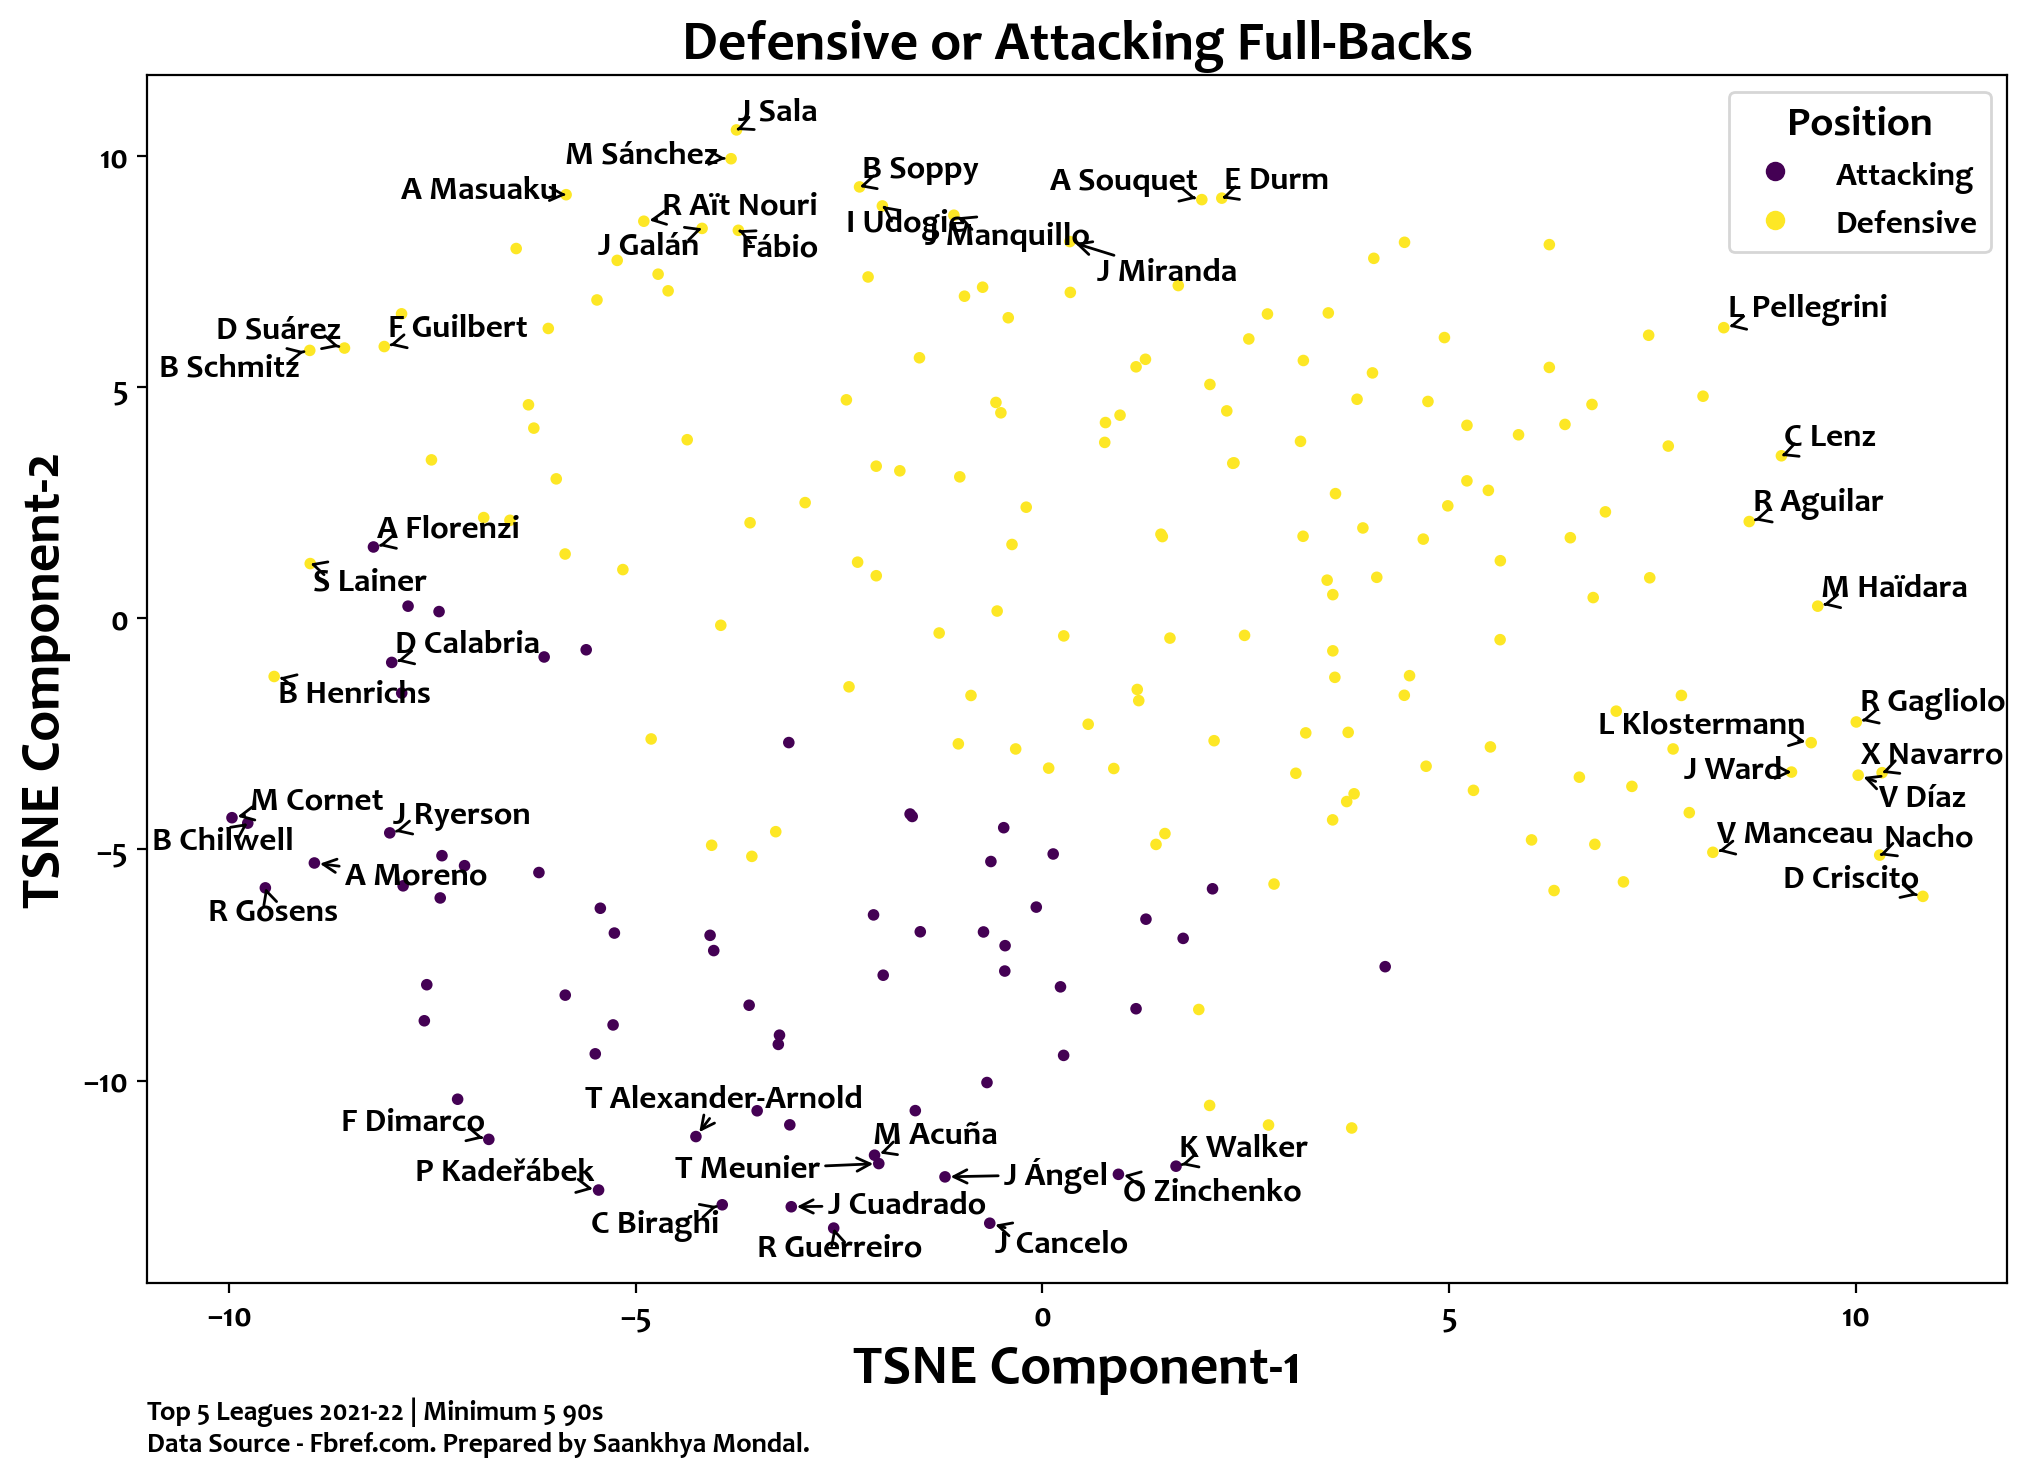

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
par_x = list(data['Component-1'])
par_y = list(data['Component-2'])
col_codes = data.y.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, c=col_codes, s=10)

outlier_top = data['Component-2'].astype(float).quantile(0.95)
outlier_bottom = data['Component-2'].astype(float).quantile(0.05)
outlier_right = data['Component-1'].astype(float).quantile(0.95)
outlier_left = data['Component-1'].astype(float).quantile(0.05)


txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_x[i]<outlier_left or par_y[i]>outlier_top or par_y[i]<outlier_bottom:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('TSNE Component-1', fontsize=20)
ax.set_ylabel('TSNE Component-2', fontsize=20)
ax.set_title('Defensive or Attacking Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=['Attacking', 'Defensive'], title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [30]:
fig.savefig('Images/TSNE-Viz-K-Means-Cluster_FB.png', dpi=400, bbox_inches='tight')